<a href="https://colab.research.google.com/github/joseph-tech-dev/machine-learning/blob/main/Student_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficients: [ 0.1667955   0.99254522 -0.05748966]
Intercept: -1.9524995494696533
Score: 79.68%
Mean Squared Error: 4.17
Mean Absolute Error: 1.27
R^2 Score: 0.80


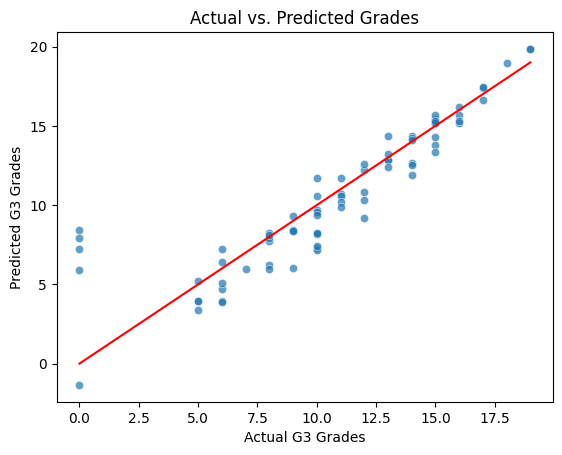

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reading dataset from .csv file using pandas
df = pd.read_csv("student-mat.csv", sep=";")
# print(df)

#print(df.columns)
"""
===================== Columns in the dataset ======================
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

"""

# Data (Features to use from the dataset)
df = df[["G1","G2", "G3", "studytime"]] # "failures", "absences","

# Defining X features and (y) valiable
X = np.array(df.drop(["G3"], axis=1))
y = np.array((df["G3"]))

# Splitting Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Defining the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Printing Coeficient and Intercept
print(f"Coeficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Prediction
predictions = model.predict(X_test)
#for x in range(len(predictions)):
#    print(predictions[x], X_test[x], y_test[x])

# Score of the model
score = model.score(X_test, y_test) * 100
print(f"Score: {score:.2f}%")

# Loss functions
print(f"Mean Squared Error: {mean_squared_error(y_test,predictions):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,predictions):.2f}")
print(f"R^2 Score: {r2_score(y_test,predictions):.2f}")


# Visualizing the model
# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

# Plot using seaborn
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.7)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red')  # Diagonal line
plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.title('Actual vs. Predicted Grades')
plt.savefig('Studentplot1.png')
